In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, confusion_matrix, accuracy_score,recall_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [13]:
df=pd.read_csv('cardio_train.csv', sep=';')

In [15]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [19]:
df.drop(['id'],axis=1,inplace=True)

In [21]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [23]:
df['age']=round((df['age'])/365)

In [27]:
df['age'].value_counts()

age
56.0    6031
54.0    5988
58.0    5702
60.0    5465
52.0    5303
50.0    5267
62.0    3926
64.0    3920
48.0    3194
46.0    2955
44.0    2837
40.0    2700
42.0    2624
55.0    1498
57.0    1452
53.0    1407
59.0    1355
51.0    1348
61.0    1221
49.0    1059
63.0    1016
41.0     766
45.0     757
47.0     754
43.0     690
39.0     409
65.0     352
30.0       4
Name: count, dtype: int64

In [33]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [66]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

/var/folders/l_/f968gbzn5r79tvzngdyrnl300000gn/T/ipykernel_1057/1791519960.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


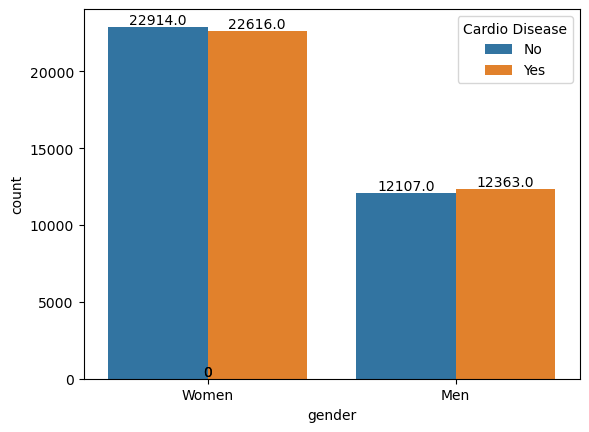

In [70]:
ax=sns.countplot(data=df,x=df['gender'],hue=df['cardio'])

# Change bar names
new_labels = ['Women', 'Men']
ax.set_xticklabels(new_labels)

new_hue_labels = ['No', 'Yes']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_hue_labels, title='Cardio Disease')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

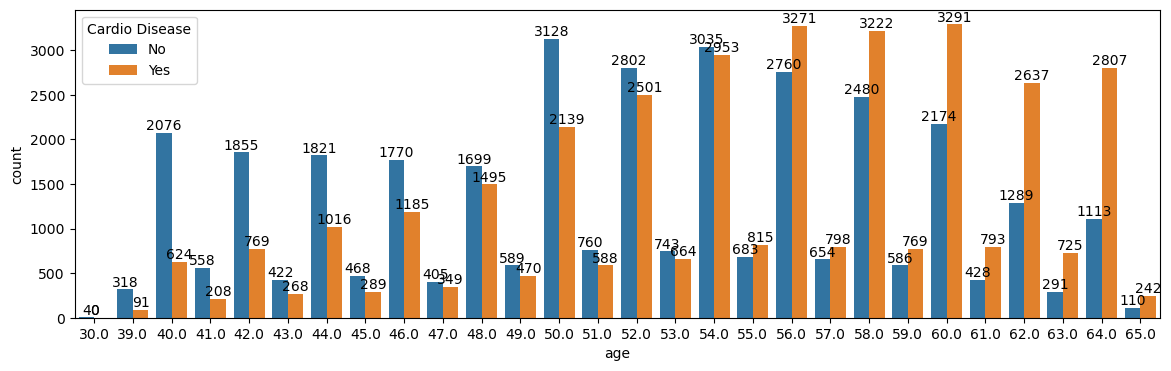

In [88]:
plt.figure(figsize=(14,4))
ax=sns.countplot(data=df,x=df['age'],hue=df['cardio'])

new_hue_labels = ['No', 'Yes']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_hue_labels, title='Cardio Disease')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

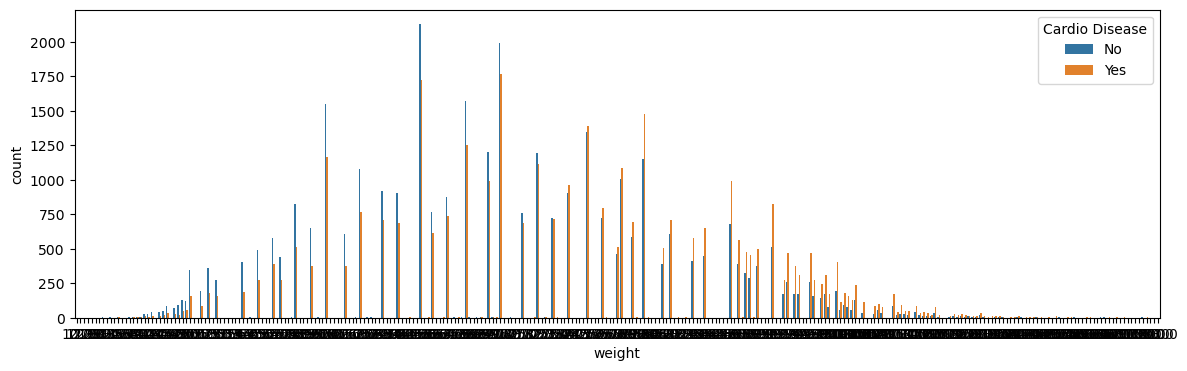

In [92]:
plt.figure(figsize=(14,4))
ax=sns.countplot(data=df,x=df['weight'],hue=df['cardio'])

new_hue_labels = ['No', 'Yes']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_hue_labels, title='Cardio Disease')
#for p in ax.patches:
    #ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

In [94]:
x=df.iloc[:,0:-1]

In [96]:
y=df.iloc[:,-1]

In [100]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [102]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=104)

In [104]:
dtclf=DecisionTreeClassifier()
rfclf=RandomForestClassifier()
svm=SVC()

In [106]:
dtclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
svm.fit(X_train,y_train)

SVC()

In [110]:
rfclf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_pred_dt=dtclf.predict(X_test)
y_pred_rf=rfclf.predict(X_test)
y_pred_svm=svm.predict(X_test)

In [114]:
y_pred_dt

array([0, 1, 1, ..., 0, 1, 1])

In [116]:
y_pred_svm

array([1, 1, 0, ..., 1, 0, 0])

In [118]:
y_pred_rf

array([1, 1, 0, ..., 0, 0, 1])

In [120]:
cmdt=confusion_matrix(y_test,y_pred_dt)
cmrf=confusion_matrix(y_test,y_pred_rf)
cmsvm=confusion_matrix(y_test,y_pred_svm)

In [122]:
print(cmdt)

[[5657 3045]
 [3379 5419]]


In [124]:
cmrf

array([[6227, 2475],
       [2730, 6068]])

In [126]:
cmsvm

array([[7146, 1556],
       [3413, 5385]])

In [128]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print(f'Accuracy of Decision Tree is: {accuracy_dt*100:.2f}')
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy of Random Forest is: {accuracy_rf*100:.2f}')
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy of Support Vector Machine is: {accuracy_svm*100:.2f}')

Accuracy of Decision Tree is: 63.29
Accuracy of Random Forest is: 70.26
Accuracy of Support Vector Machine is: 71.61


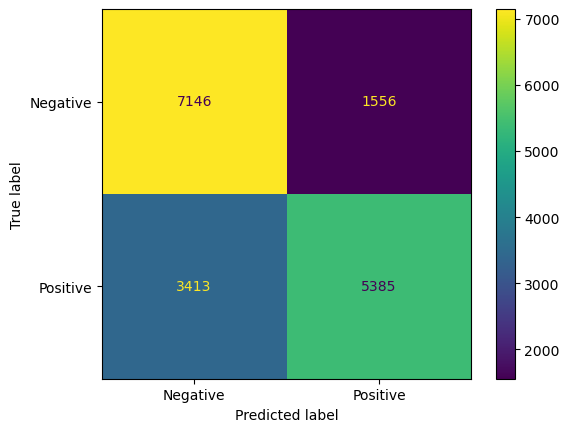

In [132]:
cmsvm_display=ConfusionMatrixDisplay(confusion_matrix=cmsvm,display_labels=['Negative','Positive'])
cmsvm_display.plot()
plt.show()

In [138]:
recall_svm=recall_score(y_test,y_pred_svm)
print(f'Sensivity or Recall score of Support Vector Tee is: {recall_svm*100:.2f}')
specificity_svm=recall_score(y_test,y_pred_svm,pos_label=0)
print(f'Specificity score of Support Vector Tee is: {specificity_svm*100:.2f}')

Sensivity or Recall score of Support Vector Tee is: 61.21
Specificity score of Support Vector Tee is: 82.12


In [ ]:
#SVM algorithm can predict True Positive value in a good manner while the True Negative value is less acuurate